<a href="https://colab.research.google.com/github/dheeraj0000/2216177_AIML_Bootcamp_2023/blob/main/outbreak_detect_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import pandas as pd

In [22]:
dataset=pd.read_csv('/content/outbreak_detect.csv')

In [23]:
dataset.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
3,NaN,24.0,84.57,11.15,9693,482,No
4,34.0,24.0,59.16,9.06,4198,211,No


In [24]:
print(dataset.isnull().any())

maxTemp         True
minTemp         True
avgHumidity    False
Rainfall       False
Positive       False
pf             False
Outbreak        True
dtype: bool


In [25]:
print(dataset.dtypes)

maxTemp        float64
minTemp        float64
avgHumidity    float64
Rainfall       float64
Positive         int64
pf               int64
Outbreak        object
dtype: object


In [26]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   maxTemp      24 non-null     float64
 1   minTemp      25 non-null     float64
 2   avgHumidity  26 non-null     float64
 3   Rainfall     26 non-null     float64
 4   Positive     26 non-null     int64  
 5   pf           26 non-null     int64  
 6   Outbreak     25 non-null     object 
dtypes: float64(4), int64(2), object(1)
memory usage: 1.5+ KB


In [27]:
dataset=dataset.dropna()

In [28]:
dataset

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
4,34.0,24.0,59.16,9.06,4198,211,No
5,34.0,27.0,73.23,0.00,11808,712,Yes
6,31.0,24.0,88.77,41.40,10881,648,Yes
7,33.0,24.0,77.94,23.88,8830,459,Yes
8,31.0,24.0,84.57,11.15,9693,482,No
9,36.0,24.0,53.40,2.12,9310,549,No
10,32.0,23.0,57.50,0.00,13154,838,Yes


In [29]:
dataset=dataset.drop(['Positive', 'pf'], axis=1)

In [30]:
dataset

,maxTemp,minTemp,avgHumidity,Rainfall,Outbreak
0,29.0,18.0,49.74,0.00,No
1,34.0,23.0,83.27,15.22,Yes
2,40.0,23.0,50.74,0.00,No
4,34.0,24.0,59.16,9.06,No
5,34.0,27.0,73.23,0.00,Yes
6,31.0,24.0,88.77,41.40,Yes
7,33.0,24.0,77.94,23.88,Yes
8,31.0,24.0,84.57,11.15,No
9,36.0,24.0,53.40,2.12,No
10,32.0,23.0,57.50,0.00,Yes


In [31]:
import matplotlib.pyplot as plt

In [32]:
x = dataset.iloc[:,:-1].values
# output

y = dataset.iloc[:, -1].values

In [33]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [34]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)#normalizing
xtest = sc_x.transform(xtest)
print ('train value:',xtrain[0:1, :])
print ('test value:',xtest[0:1, :])

train value: [[-0.41907904 -0.84051051  0.53331168 -0.46893213]]
test value: [[ 1.73618459 -0.13271219 -1.04918848 -0.42875589]]


In [35]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 0)

In [36]:
model.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [37]:
y_pred = model.predict(xtest)
y_pred

array(['No', 'No', 'No', 'No', 'Yes', 'No', 'No'], dtype=object)

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Confusion Matrix : 
 [[3 1]
 [3 0]]
Accuracy :  0.42857142857142855


In [39]:
model.score(x,y)

0.391304347826087

In [40]:
model.score(xtest,ytest)

0.42857142857142855

NAIVEY'S BAYES ALGORITHM (BAYES THEOREM)

In [41]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [42]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)#normalizing
xtest = sc_x.transform(xtest)

In [43]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(xtrain, ytrain)

GaussianNB()

In [44]:
y_pred = gnb.predict(xtest)

In [45]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.8333333333333334


CORRELATION MATRIX

In [46]:
corr_matrix=dataset.corr()
print(corr_matrix)

              maxTemp   minTemp  avgHumidity  Rainfall
maxTemp      1.000000  0.672748    -0.624309 -0.337345
minTemp      0.672748  1.000000    -0.168180 -0.014123
avgHumidity -0.624309 -0.168180     1.000000  0.596079
Rainfall    -0.337345 -0.014123     0.596079  1.000000


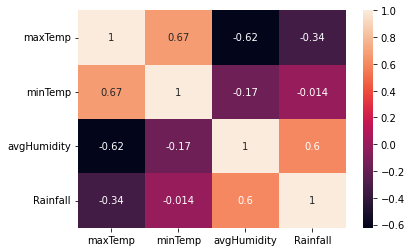

In [47]:
import seaborn as sns
sns.heatmap(corr_matrix,annot=True)
plt.show()